In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display as d
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(8,8)})
sns.set_style("white")
import glob
import json
import os
import sys
import shutil


In [2]:

def read_results(x):
    r = []
    with open(x) as xp:
        j = json.load(xp)
    for i, v in enumerate(j["val_accuracy"]):
        rr = {
            "model": j["model"],
            "val_accuracy": v,
            "epoch": i
        }
        r.append(rr)
    return r
    
df = pd.DataFrame(sum(list(map(read_results, glob.glob("results/rules_2_small/*.json"))), []))

d(df)

,model,val_accuracy,epoch
0,DenseNet169,0.506360,0
1,DenseNet169,0.526908,1
2,DenseNet169,0.545499,2
3,DenseNet169,0.553327,3
4,DenseNet169,0.527397,4
...,...,...,...
1945,InceptionResNetV2,0.508806,145
1946,InceptionResNetV2,0.499022,146
1947,InceptionResNetV2,0.493640,147
1948,InceptionResNetV2,0.493640,148


<AxesSubplot:xlabel='epoch', ylabel='val_accuracy'>

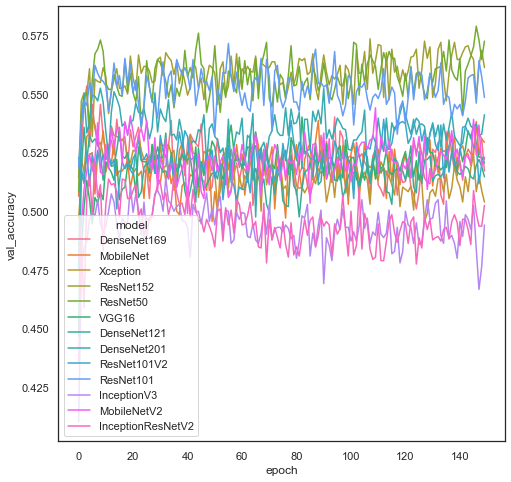

In [3]:
sns.lineplot(x="epoch", y="val_accuracy", hue="model", data=df)

<AxesSubplot:xlabel='val_accuracy', ylabel='model'>

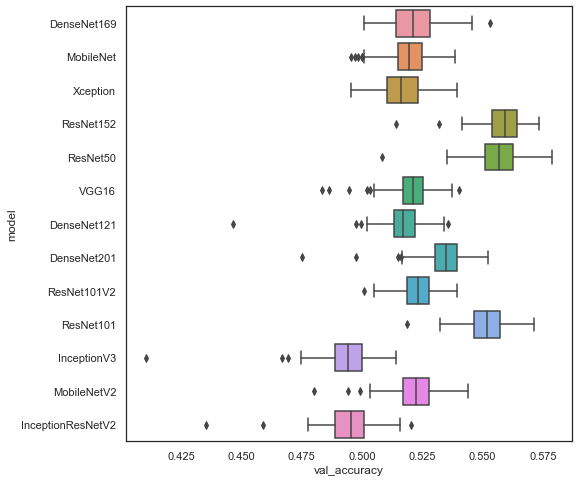

In [4]:
sns.boxplot(y="model", x="val_accuracy", data=df)

In [5]:
df[["model", "val_accuracy"]].groupby(by="model").max().sort_values(by="val_accuracy")

,val_accuracy
model,
InceptionV3,0.514188
InceptionResNetV2,0.520548
DenseNet121,0.535714
MobileNet,0.538650
ResNet101V2,0.539628
Xception,0.539628
VGG16,0.540117
MobileNetV2,0.544031
DenseNet201,0.552348


In [6]:
!mkdir -p results/rules_2_small/figures/


7
2
[7 1 0 ... 2 4 1] 2044 2044
                precision    recall  f1-score   support

framing_framed       0.57      0.60      0.59       307
  leadinglines       0.54      0.52      0.53       327
      patterns       0.37      0.52      0.43       178
    repetition       0.61      0.42      0.49       195
  ruleofthirds       0.35      0.35      0.35       280
    simplicity       0.44      0.54      0.48       271
     symmetric       0.76      0.67      0.71       248
       texture       0.62      0.51      0.56       238

      accuracy                           0.52      2044
     macro avg       0.53      0.51      0.52      2044
  weighted avg       0.53      0.52      0.52      2044

{
    "model": "DenseNet121",
    "accuracy": 0.5176125244618396,
    "f1": 0.5207753090115836,
    "precision": 0.5331318845825135,
    "recall": 0.5176125244618396,
    "mcc": 0.44687350337632287
}


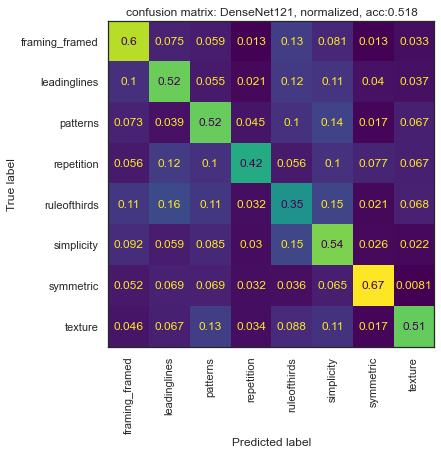

In [36]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import matthews_corrcoef, accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import classification_report


def get_class(x):
    return np.argmax(x)


sns.set(rc={'figure.figsize':(6,6)})
sns.set_style("white")

def eval_model(resfile, resultdir="results/rules_2_small"):
    with open(resfile) as xfp:
        one_dnn = json.load(xfp)
    #print(one_dnn.keys())
    #print(one_dnn["classnames"])
    #print(one_dnn["pred"])
    #print(one_dnn["truth"])
    
    model = os.path.splitext(os.path.basename(resfile))[0]
    numclasses = len(one_dnn["classnames"])
    one_dnn["pred_d"] = np.array(one_dnn["pred"]).reshape((len(one_dnn["pred"]) // numclasses, numclasses))

    print(get_class(one_dnn["pred_d"][0]))
    print(get_class([1,2,3]))

    xy = np.apply_along_axis(get_class, 1, one_dnn["pred_d"])
    print(xy, len(xy), len(one_dnn["pred"]) // numclasses)
    one_dnn["pred_c"] = xy
    
    

    cmd = ConfusionMatrixDisplay.from_predictions(
        one_dnn["truth"], 
        one_dnn["pred_c"],
        display_labels=one_dnn["classnames"],
        normalize="true",
        xticks_rotation="vertical",
        colorbar=False
    )
    ax = cmd.ax_
    val_acc = accuracy_score(one_dnn["truth"], one_dnn["pred_c"])
    ax.set_title(f"confusion matrix: {model}, normalized, acc:{round(val_acc, 3)}")
    ax.get_figure().savefig(f"{resultdir}/figures/confusion_matrix_{model}.pdf", bbox_inches="tight")
   
    class_rep = classification_report(one_dnn["truth"], one_dnn["pred_c"], target_names=one_dnn["classnames"])
    print(class_rep)
    return {
        "model": model,
        "accuracy": accuracy_score(one_dnn["truth"], one_dnn["pred_c"]),
        "f1": f1_score(one_dnn["truth"], one_dnn["pred_c"], average='weighted'),
        "precision": precision_score(one_dnn["truth"], one_dnn["pred_c"], average='weighted'),
        "recall": recall_score(one_dnn["truth"], one_dnn["pred_c"], average='weighted'),
        "mcc": matthews_corrcoef(one_dnn["truth"], one_dnn["pred_c"]),
        
    }

#eval_model(resfile="results/rules/ResNet50V2.json", resultdir="results/rules")
print(json.dumps(
        eval_model(
            resfile="results/rules_2_small/DenseNet121.json", 
            resultdir="results/rules_2_small"
        )
    , indent=4)
)


results/rules_2_small/DenseNet169.json
4
2
[4 0 4 ... 1 1 7] 2044 2044
                precision    recall  f1-score   support

framing_framed       0.65      0.49      0.56       307
  leadinglines       0.54      0.50      0.52       327
      patterns       0.53      0.39      0.45       178
    repetition       0.49      0.46      0.47       195
  ruleofthirds       0.33      0.46      0.38       280
    simplicity       0.48      0.49      0.48       271
     symmetric       0.61      0.80      0.69       248
       texture       0.59      0.51      0.55       238

      accuracy                           0.52      2044
     macro avg       0.53      0.51      0.51      2044
  weighted avg       0.53      0.52      0.52      2044

results/rules_2_small/MobileNet.json
7
2
[7 0 0 ... 1 4 3] 2044 2044
                precision    recall  f1-score   support

framing_framed       0.57      0.57      0.57       307
  leadinglines       0.53      0.51      0.52       327
      patterns  

                precision    recall  f1-score   support

framing_framed       0.58      0.50      0.54       307
  leadinglines       0.44      0.61      0.51       327
      patterns       0.39      0.39      0.39       178
    repetition       0.56      0.43      0.49       195
  ruleofthirds       0.36      0.31      0.34       280
    simplicity       0.41      0.58      0.48       271
     symmetric       0.80      0.63      0.70       248
       texture       0.64      0.48      0.55       238

      accuracy                           0.50      2044
     macro avg       0.52      0.49      0.50      2044
  weighted avg       0.52      0.50      0.50      2044

results/rules_2_small/InceptionResNetV2.json
0
2
[0 1 0 ... 6 4 4] 2044 2044
                precision    recall  f1-score   support

framing_framed       0.49      0.56      0.53       307
  leadinglines       0.45      0.63      0.52       327
      patterns       0.47      0.35      0.40       178
    repetition       0.

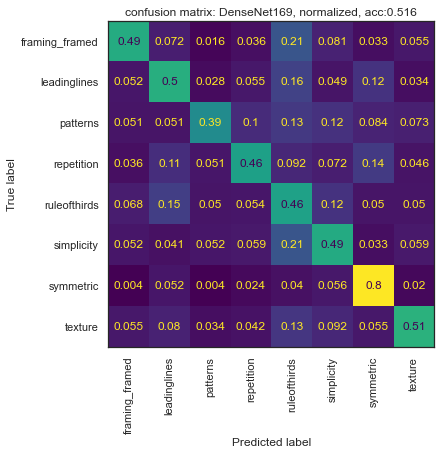

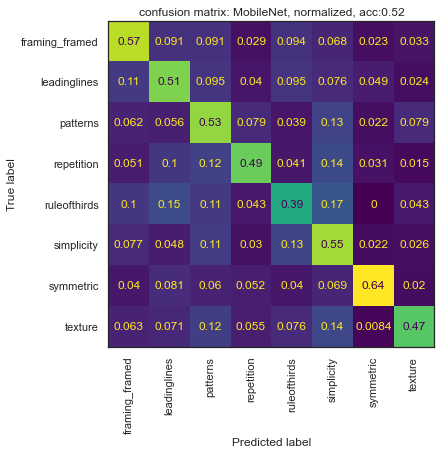

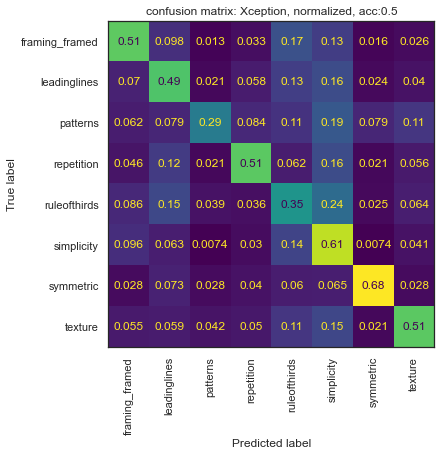

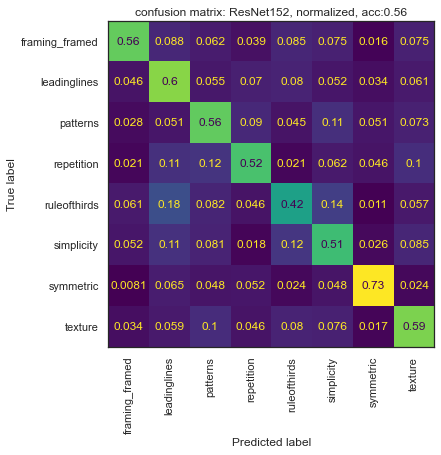

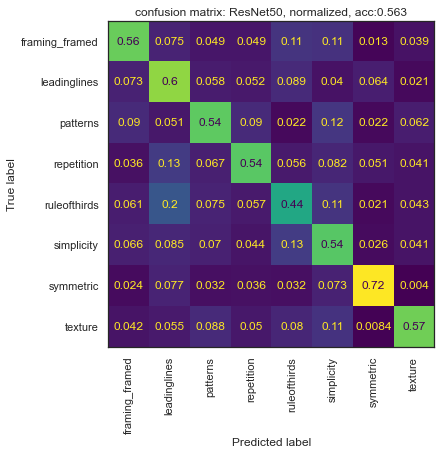

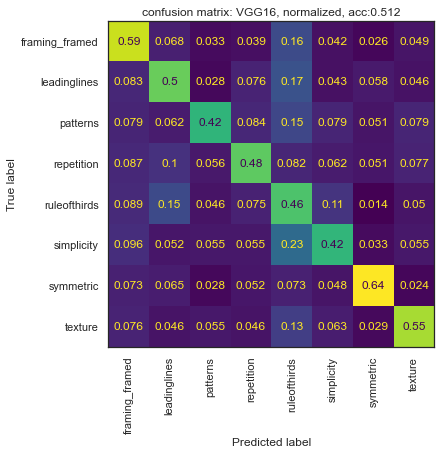

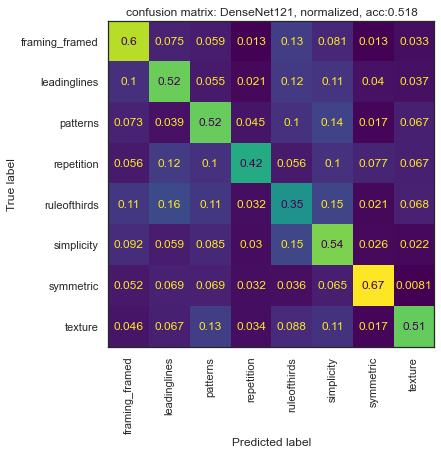

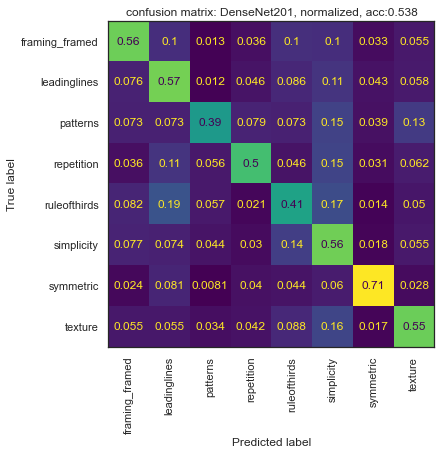

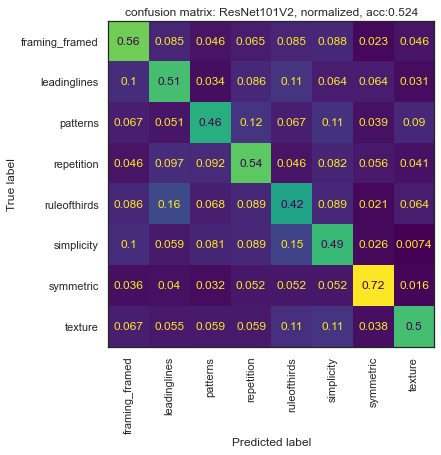

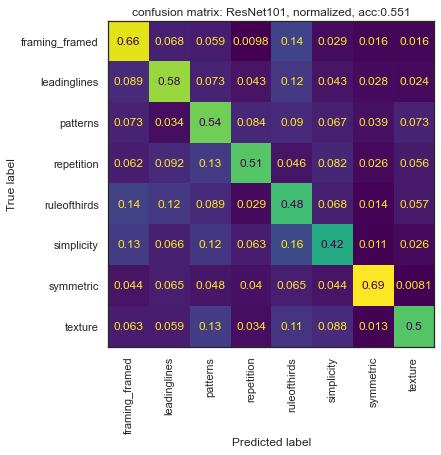

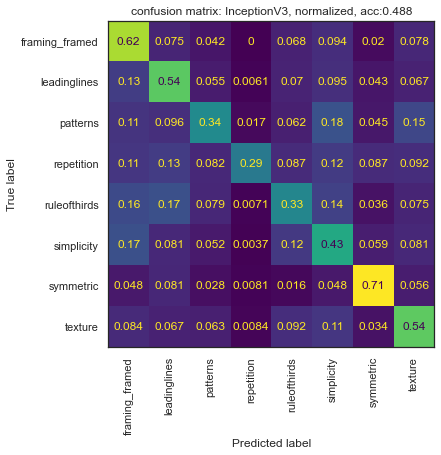

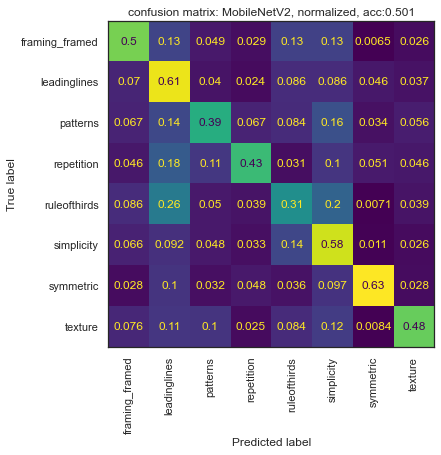

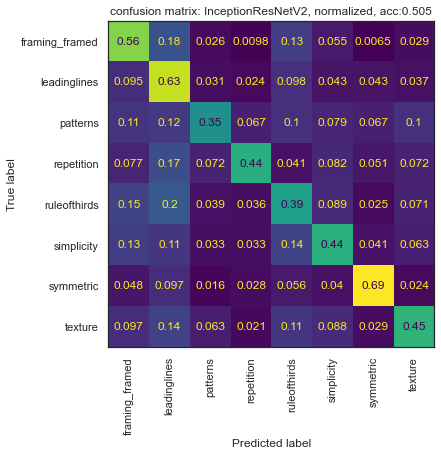

In [37]:
metrics = []
for x in glob.glob("results/rules_2_small/*.json"):
    print(x)
    metrics.append(
        eval_model(
            resfile=x, 
            resultdir="results/rules_2_small"
        )
    )

In [40]:
dm = pd.DataFrame(metrics).sort_values(by="accuracy", ascending=False)

d(dm)
print(dm.round(3).to_latex(index=False))

,model,accuracy,f1,precision,recall,mcc
4,ResNet50,0.563112,0.565186,0.571304,0.563112,0.498854
3,ResNet152,0.560176,0.562565,0.571927,0.560176,0.496591
9,ResNet101,0.550881,0.555158,0.570066,0.550881,0.485711
7,DenseNet201,0.538160,0.539835,0.548809,0.538160,0.469442
8,ResNet101V2,0.524462,0.525981,0.530704,0.524462,0.454832
1,MobileNet,0.519569,0.524787,0.541983,0.519569,0.450539
6,DenseNet121,0.517613,0.520775,0.533132,0.517613,0.446874
0,DenseNet169,0.515656,0.516126,0.528902,0.515656,0.445100
5,VGG16,0.511742,0.515037,0.523746,0.511742,0.439739
12,InceptionResNetV2,0.505382,0.503897,0.513819,0.505382,0.430492


\begin{tabular}{lrrrrr}
\toprule
            model &  accuracy &    f1 &  precision &  recall &   mcc \\
\midrule
         ResNet50 &     0.563 & 0.565 &      0.571 &   0.563 & 0.499 \\
        ResNet152 &     0.560 & 0.563 &      0.572 &   0.560 & 0.497 \\
        ResNet101 &     0.551 & 0.555 &      0.570 &   0.551 & 0.486 \\
      DenseNet201 &     0.538 & 0.540 &      0.549 &   0.538 & 0.469 \\
      ResNet101V2 &     0.524 & 0.526 &      0.531 &   0.524 & 0.455 \\
        MobileNet &     0.520 & 0.525 &      0.542 &   0.520 & 0.451 \\
      DenseNet121 &     0.518 & 0.521 &      0.533 &   0.518 & 0.447 \\
      DenseNet169 &     0.516 & 0.516 &      0.529 &   0.516 & 0.445 \\
            VGG16 &     0.512 & 0.515 &      0.524 &   0.512 & 0.440 \\
InceptionResNetV2 &     0.505 & 0.504 &      0.514 &   0.505 & 0.430 \\
      MobileNetV2 &     0.501 & 0.504 &      0.522 &   0.501 & 0.428 \\
         Xception &     0.500 & 0.503 &      0.522 &   0.500 & 0.427 \\
      InceptionV3 &   

/tmp/ipykernel_2148078/2464329344.py:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(dm.round(3).to_latex(index=False))


['data/rules_2_small/framing_framed/51611271804_acd1b44701_o.jpg', 'data/rules_2_small/framing_framed/52352960906_72d72be0f4_o.jpg', 'data/rules_2_small/framing_framed/52589976866_d9131857eb_o.jpg', 'data/rules_2_small/framing_framed/52706520675_5d0d69ddd6_o.jpg', 'data/rules_2_small/framing_framed/52534828945_a90bd6491c_o.jpg', 'data/rules_2_small/framing_framed/51845756456_0b6c21800a_o.jpg', 'data/rules_2_small/framing_framed/51234863802_18992b4830_o.jpg', 'data/rules_2_small/framing_framed/52537076397_0ebfc03ef6_o.jpg', 'data/rules_2_small/framing_framed/52093507317_066b02c921_o.jpg', 'data/rules_2_small/framing_framed/51344742881_f3d9b65b71_o.jpg']


,image,rule
0,data/rules_2_small/framing_framed/51611271804_...,framing_framed
1,data/rules_2_small/framing_framed/52352960906_...,framing_framed
2,data/rules_2_small/framing_framed/52589976866_...,framing_framed
3,data/rules_2_small/framing_framed/52706520675_...,framing_framed
4,data/rules_2_small/framing_framed/52534828945_...,framing_framed
...,...,...
20444,data/rules_2_small/repetition/51014261695_f2e6...,repetition
20445,data/rules_2_small/repetition/50384162042_7eb9...,repetition
20446,data/rules_2_small/repetition/51053476261_3530...,repetition
20447,data/rules_2_small/repetition/51902192399_5e46...,repetition


<AxesSubplot:xlabel='count', ylabel='rule'>

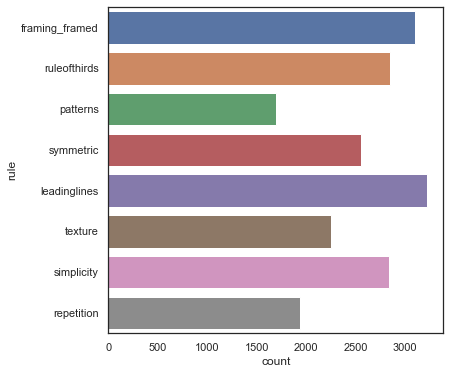

In [9]:
# check dataset for training and validation (count number of images per "rule")
images = []
for rule in list(glob.glob("data/rules_2_small/*/")):
    images.extend(list(glob.glob(rule + "*.jpg")))
    
print(images[0:10])
dimg = pd.DataFrame({"image": images})
dimg["rule"] = dimg["image"].apply(lambda x: os.path.basename(os.path.dirname(x)))
d(dimg)

sns.countplot(y=dimg["rule"])

['framing_framed', 'leadinglines', 'patterns', 'repetition', 'ruleofthirds', 'simplicity', 'symmetric', 'texture']
dict_keys(['accuracy', 'classnames', 'loss', 'model', 'pred', 'truth', 'val_accuracy', 'val_loss', 'validation_files', 'pred_d', 'pred_c'])


,pred_c,truth,validation_files
0,4,0,data/rules_2_small/framing_framed/50418720862_...
1,1,0,data/rules_2_small/framing_framed/50424514073_...
2,2,0,data/rules_2_small/framing_framed/50427505063_...
3,1,0,data/rules_2_small/framing_framed/50522649153_...
4,4,0,data/rules_2_small/framing_framed/50523550637_...
...,...,...,...
2039,1,7,data/rules_2_small/texture/52733748861_2e096b0...
2040,4,7,data/rules_2_small/texture/52733835681_5449e50...
2041,1,7,data/rules_2_small/texture/52733836111_71d15cb...
2042,3,7,data/rules_2_small/texture/52734320213_635e450...


data/rules_2_small/ruleofthirds/52567634350_1b6a9b615f_o.jpg


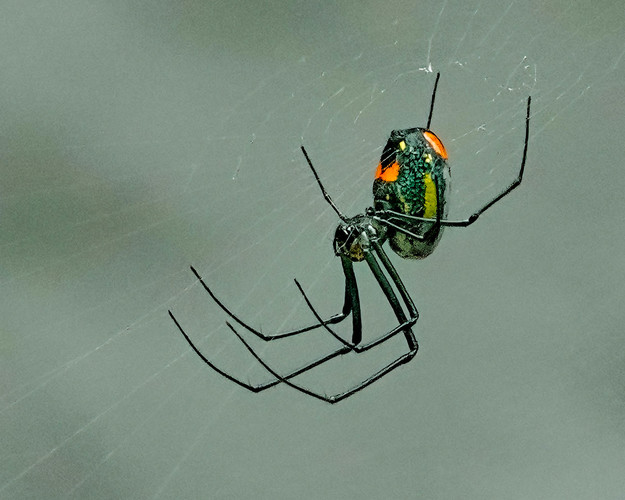

In [95]:
resfile="results/rules_2_small/ResNet50.json"
with open(resfile) as xfp:
    one_dnn = json.load(xfp)

model = os.path.splitext(os.path.basename(resfile))[0]
numclasses = len(one_dnn["classnames"])
one_dnn["pred_d"] = np.array(one_dnn["pred"]).reshape((len(one_dnn["pred"]) // numclasses, numclasses))
xy = np.apply_along_axis(get_class, 1, one_dnn["pred_d"])
one_dnn["pred_c"] = xy

print(one_dnn["classnames"])
print(one_dnn.keys())
dd = pd.DataFrame({
    "pred_c": one_dnn["pred_c"], 
    "truth": one_dnn["truth"], 
    "validation_files": one_dnn["validation_files"]
})

d(dd)

t = dd[dd["truth"] == one_dnn["classnames"].index("ruleofthirds")]
example = t[t["pred_c"] == one_dnn["classnames"].index("simplicity") ]["validation_files"].values[29]
print(example)

from IPython.display import Image
Image(example)
